Word2Vec Visualization of Top Words for the 4 Topic LDA.  Word2vec followed by t-Sne.

In [3]:
import gensim

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.manifold import TSNE


In [4]:
topldawords = pd.read_csv('./LDAresults/ldatopwordsfor5topics.csv')
topldawords.head(5)

,ldatopic,word,probability,rank
0,0,chocolate,0.040577,1
1,0,tea,0.037534,2
2,0,cookie,0.031508,3
3,0,latte,0.024652,4
4,0,flavor,0.022728,5


In [5]:
#Reading in the sentences to train a word2vec model
import os
import warnings
warnings.filterwarnings("ignore")

class SentenceCorpus(object):

    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        with open(self.filename, "r") as i:
            for line in i:
                tokens = line.strip().split()
                yield tokens

# This command will unzip the text file
# The rest of the cell will run even if this command fails
!gzip -d ../data/reddit_aww_comments.csv.gz
                
TEXT_FILE = './ProcessedData/reviewsentences.csv'
sentences = SentenceCorpus(TEXT_FILE)


gzip: can't stat: ../data/reddit_aww_comments.csv.gz (../data/reddit_aww_comments.csv.gz.gz): No such file or directory


In [32]:
model = gensim.models.Word2Vec(sentences, min_count=25, window=10, size=100,iter=100)

In [33]:

selected_words = topldawords.word.to_list()
embeddings = [model.wv[w] for w in selected_words]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)


         tsne1       tsne2
0  -138.934921  108.487549
1  -118.758514   70.364281
2  -162.854248  -40.130463
3   -97.605316  134.524551
4   -34.675480   89.681252
5  -159.804306   76.022499
6  -125.056046  -59.886795
7   -18.202150  133.825806
8  -174.861084   -0.751714
9  -101.456749   15.701503
10   30.949501   21.534260
11  -43.974800 -128.039871
12   58.167645  -88.195770
13   51.647011   90.507149
14   39.287422 -118.728134
15   23.236162 -150.196777
16   -3.504279 -121.115631
17  101.593605 -107.846230
18   17.483116   55.464027
19   29.340929  -11.484496
20  -49.812649  -65.685753
21  -53.336014  -26.392126
22  -40.263561   25.533365
23  144.291641  -69.542145
24  -17.380739    1.297472
25  -64.928215    3.842669
26   -9.996833  -43.540707
27 -137.810150   26.042994
28  -90.898003  -21.520460
29 -135.302643  -10.304409
30  100.340302   63.580917
31   60.484142  -45.826706
32   82.921661   15.199177
33   98.203072  -14.648132
34  109.185219   30.951258
35  142.838211   72.575073
3

Text(0, 0.5, 't-SNE 2')

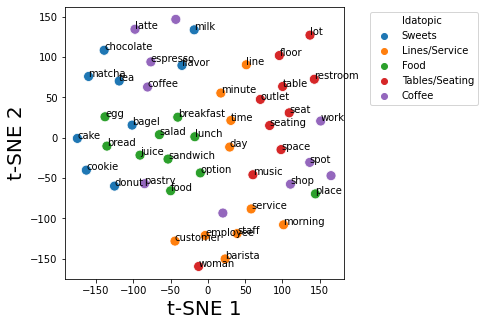

In [43]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
toplot = pd.DataFrame()
toplot['tsne1'] = x
toplot['tsne2'] = y

def labeler(i):
    if i==0:
        return('Sweets')
    elif i ==1:
        return('Lines/Service')
    elif i ==2:
        return('Food')
    elif i ==3:
        return('Tables/Seating')
    elif i ==4:
        return('Coffee')

print(toplot)
toplot['ldatopic'] = pd.Series([labeler(i) for i in topldawords['ldatopic'].to_list()])
toplot['word'] = topldawords.word
print(toplot)
#toplot['ldatopic'] = topldawords.astype('category')
sns.scatterplot('tsne1','tsne2',hue = 'ldatopic',data=toplot,ax=ax,s=100)

seen = {}
for i, txt in enumerate(selected_words):
    if txt in seen:
        print(txt)
    if txt not in seen:
        plt.annotate(txt, (x[i], y[i]), size=10)
        seen[txt]=1

        
ax.legend(bbox_to_anchor=(1.5, 1))
ax.set_xlabel("t-SNE 1",fontsize=20)
ax.set_ylabel("t-SNE 2",fontsize=20)

In [18]:
topldawords.ldatopic.value_counts()

3    10
2    10
1    10
0    10
Name: ldatopic, dtype: int64

In [24]:
toplot['ldatopic'].value_counts()

0    10
2    10
1    10
3    10
Name: ldatopic, dtype: int64

In [35]:
toplot

,tsne1,tsne2,ldatopic
0,-400.556335,119.967949,0
1,284.120758,161.657944,0
2,161.826035,225.185806,0
3,150.254929,-103.634956,0
4,-434.678192,-247.767960,0
5,152.757034,-328.668457,0
6,236.496445,-30.947479,0
7,335.795837,43.761433,0
8,44.761440,-146.344009,0
9,184.150375,87.161934,0
